In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-datasets/SMSSpamCollection
/kaggle/input/spam-datasets/readme


In [139]:
import nltk
#nltk.download_shell()
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
 messages = [line.rstrip() for line  in open("/kaggle/input/spam-datasets/SMSSpamCollection")]

In [141]:
print(len(messages))

5574


In [142]:
messages[0:5]


['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though"]

In [143]:
for mesg_num,message in enumerate(messages[0:5]):
    print(mesg_num, message)
    print("\n")
    
#tab seperated file \t

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




In [144]:
messages = pd.read_csv("/kaggle/input/spam-datasets/SMSSpamCollection",sep="\t",names=["label","message"])

In [145]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [146]:
messages.groupby(by='label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [147]:
messages["length"] = messages["message"].apply(len)

In [148]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


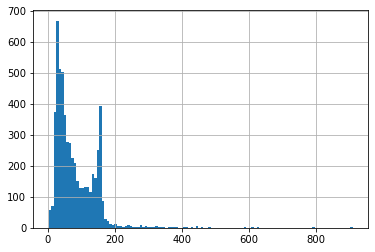

In [149]:
messages["length"].hist(bins=120)    

In [150]:
messages["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [151]:
messages[messages["length"]==910]["message"].iloc[0]       #to show whole mesg

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ee390ae10>,
      dtype=object)

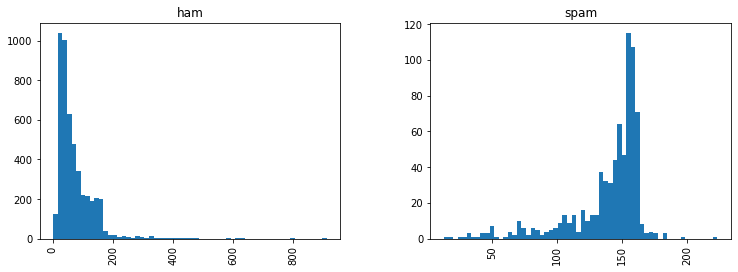

In [152]:
messages.hist(column="length",by="label",bins=60,figsize=(12,4))

# **Spam messages seem to have more characters**

In [153]:
#Text preprocessing for classification
#remove stop words (general words)

import string
message = "sample text! with,& punctuation."
#remove punctuation  sring.punctuiation

non_punctuation = [c for c in message if c not in string.punctuation]
non_punctuation = "".join(non_punctuation)


In [154]:
from nltk.corpus import stopwords

stopwords.words("english")       #useless words fot classification


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [155]:
non_punctuation.split() #split into words

['sample', 'text', 'with', 'punctuation']

In [156]:
clean_message = [word for word in non_punctuation.split() if word.lower() not in stopwords.words("english") ]

In [157]:
clean_message

['sample', 'text', 'punctuation']

# Building function with above functionality (Tokenization)

Tokenization is cleaning the text of punctuation and other common words to make the text more useful


In [158]:
import string
from nltk.corpus import stopwords
def text_process(message):
    non_punctuation = [char for char in message if char not in string.punctuation]       # remove punctuation
    non_punctuation = "".join(non_punctuation)
    clean_message = [word for word in non_punctuation.split() if word.lower() not in stopwords.words("english") ]
    return clean_message    

In [159]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [160]:
messages["message"].head(5).apply(text_process)                #TOKENIZED

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

Use stemming to club similar words wrt dictionary if needed
STEMMING - not great for shortform messages need full words

In [161]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


BAG OF WORDS MODEL

In [162]:
from sklearn.feature_extraction.text import CountVectorizer


In [163]:
bow_transformer = CountVectorizer(analyzer = text_process)
bow_transformer.fit(messages["message"])

# use our own custom function text_process defined above inside the count vectorizer

CountVectorizer(analyzer=<function text_process at 0x7f3ee34380e0>)

In [164]:
len(bow_transformer.vocabulary_)

11425

In [165]:
messages_bow = bow_transformer.transform(messages["message"])

In [166]:
messages_bow.shape

(5572, 11425)

In [167]:
messages_bow.nnz              #no of Non zeroes 

50548

In [168]:
#sparsity

sparsity = 100*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1])
format(sparsity)

'0.07940295412668218'

# Weights calculated by TF-IDF

In [174]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit_transform(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [170]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [177]:
from sklearn.naive_bayes import MultinomialNB
spam_detection = MultinomialNB().fit(messages_tfidf,messages["label"])


In [178]:
all_pred = spam_detection.predict(messages_tfidf)

In [179]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [189]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(messages["message"],messages["label"],test_size=0.3)

In [198]:
from sklearn.pipeline import Pipeline
pipeline =Pipeline([("bow",CountVectorizer(analyzer=text_process)),
                    ("tfidf",TfidfTransformer()),
                     ("clf",MultinomialNB())
                    ])

In [199]:
label_train

4667     ham
4394    spam
4539     ham
1348     ham
5139     ham
        ... 
1497     ham
688      ham
5201    spam
1443     ham
1206     ham
Name: label, Length: 3900, dtype: object

In [200]:
msg_train

4667                             Not..tel software name..
4394    RECPT 1/3. You have ordered a Ringtone. Your o...
4539     Dare i ask... Any luck with sorting out the car?
1348                            She doesnt need any test.
5139    Oh shut it. Omg yesterday I had a dream that I...
                              ...                        
1497    I'm always on yahoo messenger now. Just send t...
688     Dear,Me at cherthala.in case u r coming cochin...
5201    YOU VE WON! Your 4* Costa Del Sol Holiday or £...
1443               Its ok., i just askd did u knw tht no?
1206    The whole car appreciated the last two! Dad an...
Name: message, Length: 3900, dtype: object

In [201]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f3ee34380e0>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [203]:
predictions = pipeline.predict(msg_test)

In [207]:
from sklearn.metrics import classification_report
print(classification_report(label_test,predictions))

NameError: name 'classfication_report' is not defined